# PROJEK AKHIR KECERDASAN BUATAN
## 2109106006 --> Kania Putri Ananda
## 2109106012 --> Nurmedina Maulidiah
## 2109106025 --> rismayanti

## Import Library

In [290]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import random
import seaborn as sns
from keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Data Collecting

Sumber Dataset = https://www.kaggle.com/datasets/phylake1337/fire-dataset

## Data Preprocessing

In [2]:
path = 'D:/Datasets/fire_dataset/'
path_baru = 'Dataset_Split/'
classes = ['fire_images', 'non_fire_images']

In [3]:
for cls in classes:
    os.makedirs(path + path_baru+ 'training/' + cls)
    os.makedirs(path + path_baru + 'validation/' + cls)

In [4]:
for cls in classes:
    temp = path + cls #folder untuk copy gambar
    print(temp)

    all_dataset = os.listdir(temp)
    np.random.shuffle(all_dataset)

    #80% untuk training sisanya validasi
    dataset_train, dataset_val = np.split(np.array(all_dataset),[int(len(all_dataset)*0.80)])

    #mengubah nama file
    dataset_train = [temp +'/'+ name for name in dataset_train]
    dataset_val = [temp+'/' + name for name in dataset_val]
    
    #copy gambar ke folder tujuan
    for name in dataset_train:
        shutil.copy(name, path + path_baru+'training/'+cls )


    for name in dataset_val:
        shutil.copy(name, path + path_baru+'validation/'+cls )



D:/Datasets/fire_dataset/fire_images
D:/Datasets/fire_dataset/non_fire_images


In [322]:
dataset_train = image_dataset_from_directory(
    'fire_dataset/Dataset_Split/training/',
    labels = 'inferred',
    label_mode = 'int',
    color_mode='rgb',
    class_names = ['fire_images','non_fire_images'],
    image_size = (100, 100),
    shuffle = True,
    seed = 2,
    validation_split = 0.3,
    subset = 'training'
)

dataset_validation = image_dataset_from_directory(
    'fire_dataset/Dataset_Split/training/',
    labels = 'inferred',
    label_mode = 'int',
    color_mode='rgb',
    class_names = ['fire_images','non_fire_images'],
    image_size = (100, 100),
    shuffle = True,
    seed = 2,
    validation_split = 0.3,
    subset = 'validation'
)

Found 799 files belonging to 2 classes.
Using 560 files for training.
Found 799 files belonging to 2 classes.
Using 239 files for validation.


## Preview Gambar

In [323]:
class_names = dataset_train.class_names

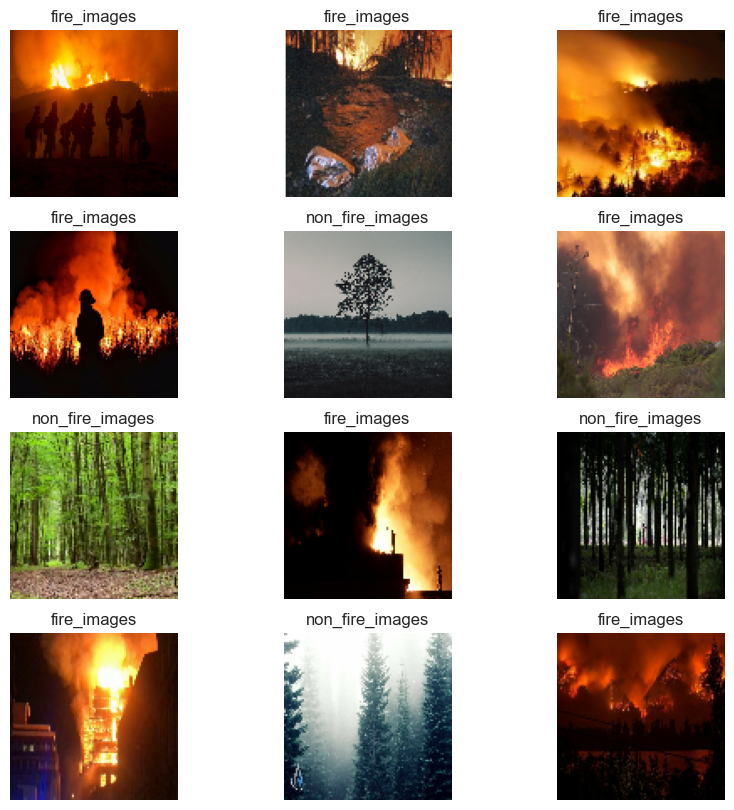

In [324]:
plt.figure(figsize=(10,10))

for images, labels in dataset_train.take(1):
    for i in range(12):
        ax = plt.subplot(4,3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis('off')

## Augmentasi Gambar

In [325]:
def augment(x, y):
    image = tf.image.random_brightness(x, max_delta = 0.5)
    return image, y

def standard(x,y) :
    images = tf.image.per_image_standardization(x)
    return images,y

In [326]:
val = dataset_validation.map(standard)
val = val.map(augment)

## Data Modelling

In [327]:
# Arsitektur model

model = Sequential([
    Conv2D(256, (3,3), activation = 'relu', input_shape=[100, 100, 3]),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(), 
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
]
)

model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_100 (Conv2D)         (None, 98, 98, 256)       7168      
                                                                 
 max_pooling2d_97 (MaxPoolin  (None, 49, 49, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 47, 47, 128)       295040    
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 23, 23, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_102 (Conv2D)         (None, 21, 21, 64)        73792     
                                                                 
 max_pooling2d_99 (MaxPoolin  (None, 10, 10, 64)     

In [328]:
# Fungsi callback untuk menghentikan proses training jika sudah mendapatkan accuracy & val_acc yang diinginkan

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            self.model.stop_training = True
cb = myCallback()

In [329]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [330]:
hasil = model.fit(dataset_train, 
         validation_data = val,
         epochs = 10,
         callbacks = cb,
         verbose = 1
         )

Epoch 1/10
18/18 [==============================] - 47s 2s/step - loss: 14.9472 - accuracy: 0.6339 - val_loss: 0.6901 - val_accuracy: 0.6736
Epoch 2/10
18/18 [==============================] - 52s 3s/step - loss: 0.4417 - accuracy: 0.7732 - val_loss: 0.6590 - val_accuracy: 0.8410
Epoch 3/10
18/18 [==============================] - 49s 3s/step - loss: 0.2735 - accuracy: 0.8893 - val_loss: 0.6263 - val_accuracy: 0.8912
Epoch 4/10
18/18 [==============================] - 54s 3s/step - loss: 0.1766 - accuracy: 0.9286 - val_loss: 0.6413 - val_accuracy: 0.8285
Epoch 5/10
18/18 [==============================] - 57s 3s/step - loss: 0.1113 - accuracy: 0.9554 - val_loss: 0.5555 - val_accuracy: 0.9038


In [331]:
model.evaluate(val, verbose=1)

8/8 [==============================] - 7s 545ms/step - loss: 0.5584 - accuracy: 0.8912


[0.5583721995353699, 0.8912134170532227]

## Evaluasi Model

1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 34ms/step


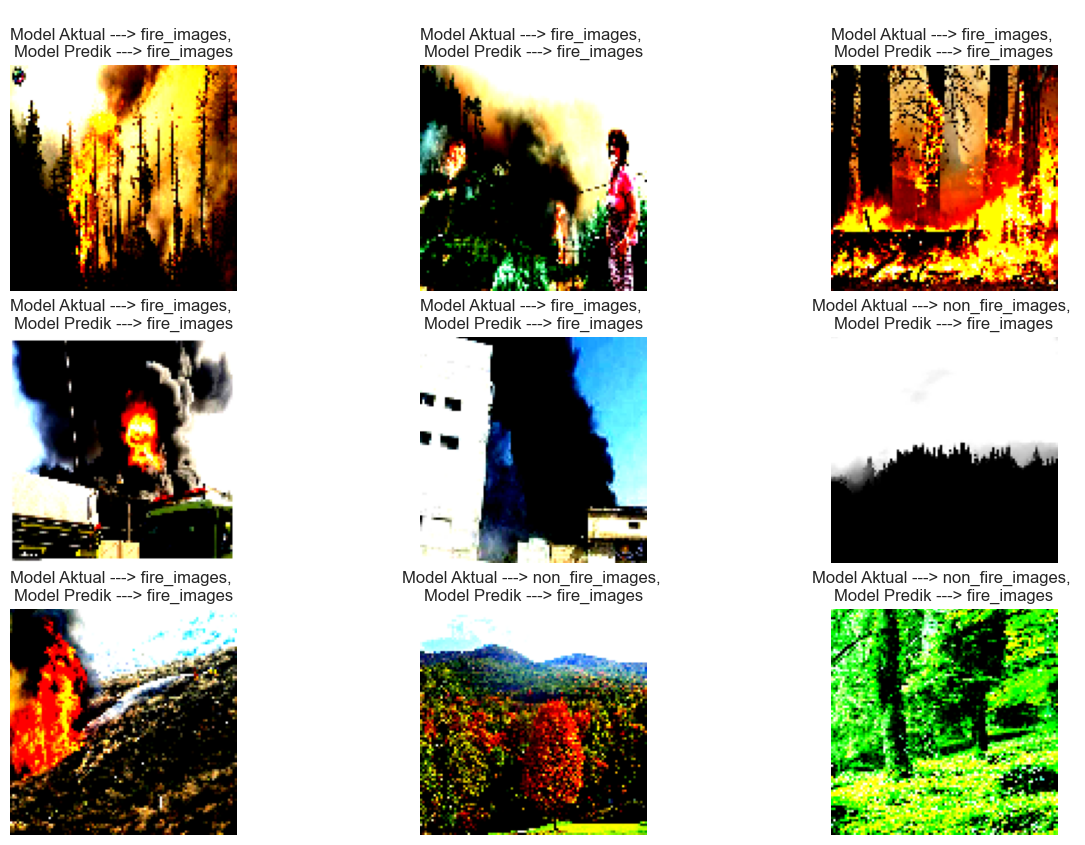

In [332]:
image, label = next(iter(val))

plt.figure(figsize=(15,10))
for i in range(9) :
    plt.subplot(3,3,i+1)
    plt.axis('off')
    predict = np.argmax(model.predict(image[i][None]))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'\nModel Aktual ---> {class_names[label[i]]}, \nModel Predik ---> {class_names[predict]}')

## Data Analysis and Visualization

In [ ]:
# epoch = [i+1 for i in range(10)]
# sns.set_theme()
# plt.figure(figsize = (16,9))
# plt.suptitle('Train vs. Validation Accuracy')

# #subplot Akurasi
# plt.subplot(1,2,1)
# sns.lineplot(x=epoch, y=hasil.history['accuracy'], label = "Akurasi Training")
# sns.lineplot(x=epoch, y=hasil.history['val_accuracy'], label = "Akurasi Validation")

# plt.xticks(epoch)
# plt.xlabel('N_epoch')
# plt.ylabel('Accuracy(%)')
# plt.title('Akurasi Train/Validatinon')

# #subplot Loss
# plt.subplot(1,2,2)
# sns.lineplot(x=epoch, y=hasil.history['loss'], label = "Loss Training")
# sns.lineplot(x=epoch, y=hasil.history['val_loss'], label = "Loss Validation")

# plt.xticks(epoch)
# plt.xlabel('N_epoch')
# plt.ylabel('Accuracy(%)')
# plt.title('Loss Train/Validatinon')

# plt.show()